# Lecture 7: Intro to NLP

## What is NLP?

NLP stands for Natural Language Processing. In essence, we conduct NLP analysis to allow for our machine to understand human language. With NLP, we attempt to teach our computers to interpret text (and spoken words) the way human can. As a result, the NLP field requires an intersection of knowledge and techniques across the fields of computer science, Artificial Intelligence, and linguistics. It combines computational linguistics which provides rule based models of human language with statistical learning models, including Machine Learning and Deep Learning. Ultimately, NLP involves a combination of speech recognition, natural language understanding, and natural language generation with a single end result: a seamless human-machine interaction.

### NLP Pipeline
As shown in the NLP pipeline diagram below (taken from https://www.nltk.org/book/ch03.html), in Lecture 6 we learned how to extract text from html files. It is now the time for us to learn how to analyse and intrepret the information contained in that text.

![NLP Pipeline](nlppipeline.png)

As will be discussed in this lecture, and illustrated in the above pipeline diagram and more specifically in the diagram on information extraction architecture below, to extract information from a given text we begin by splitting our text or document into sentece segments then into words by a process called tokenization, which will then followed up part-of-speech tagging and then formal analysis in the form of entity detection as well as relation detection through differrent models including clustering, similarity analysis, word embedding, document vectorisation, topic modelling, sentiment analysis, and many others outside the scope of our Unit.

![Information Extraction](infoextract.png)

Those different types of NLP analyses mentioned above can be categorised into the following three layers of analysis.

- _Syntax Analysis_. This is the first layer of NLP with a main task of breaking down text into sentences and then into their grammatical components. In this layer, we focus on the basic steps such as preprocessing, tokenisation and part-of-speech tagging. 
- _Semantic Analysis_. In this second layer, with NLP we aim to understand meaning by focusing on measures of relationships between words in the text and how these different words can convey messages.
- _Pragmatic Analysis_. In the final layer, the main taks of NLP is to understand context and social meaning. Here, we focus on how language is used in different situations and with different aims.

### Basic steps in NLP and working with text data

As shown in the diagram above, these are the four basic steps that we do in NLP.

- Get the raw text. The raw text can come from primary data sources, secondary data sources, Webscraping, etc.
- Prepare/preprocess the raw text. This _critically important_ steps involve tokenizing, filtering (stop words, punctuations), POS tagging, and stemming/lemmatizing.
- Generate numerical data based on the text clean text produce by the previous step. This can be in the forms of Word Embedding/Vectorizing, Feature Generation (Text similarity, etc.
- Analyse the “numerical” text data using models of Regression, Machine learning, Classification, Sentiment Analysis, etc.

### Python NLP libraries

To conduct our NLP analyses, we will use the following pacakges.

#### NLTK

The NLTK (Natural Language Tool Kit) module is automatically installed when we install the full Anaconda Python. The library and its use is fully explained in a free online book:  [Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit (Bird, Klein & Loper; 2009)](https://www.nltk.org/book/). Another important advantage of using NLTK to learn how to do NLP with Python is the fact that NLTK comes with many text data (https://www.nltk.org/nltk_data/) including corpora such as "inaugural", "state_union", "stopwords", and "abc“. 

```{note}
A corpus is a collection of text.
```
Each of these text data will need to be downloaded as shown below before its first use.

In [3]:
# inaugural corpus (a collection of US President Inaugural speech)
from nltk import download
download('inaugural') #only download if you have never downloaded it

# to use the downloaded corpus
from nltk.corpus import inaugural

# list the different documents inside the nltk’s inaugural corpus
print(inaugural.fileids()) 

# President Trump’s 2017 inauguration speech
trump2017 = inaugural.raw('2017-Trump.txt')


['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\apalangkaraya\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


## Text Preprocessing

The objective of preprocessing is to ensure that only information of interest will be extracted from text in the subsequent steps of NLP. There are at least six different tasks that need to be completed to prepare the text for further analysis.

- Tokenizing (splitting text into tokens, defined as the smallest unit size of our interest, such as sentences or words.)
- Cleaning (removing symbols, specialised, and numerical characters)
- Normalisation (converting text to uniform case, say all lower case, and remove punctuations)
- Stemming and lemmatisation (reduce words to their root form; lemmatisation is different from stemming because it considers actual word meaning)
- Removing common stop words such as ‘the’, ‘and’, ‘is’, ‘in’, etc.
- Part of speech tagging (assigns grammatical categories to each token)

### Tokenizing

Text data are usually unstructured data consisting of documents and paragraphs. However, structured text data are easier to analyse. In essence, tokenizing is splitting up text by word or by sentence and we do it as the first step to transform unstructured text data into structured data. Using NLTK's tokenizer methods we can tokenize our text in two ways.
- Tokenizing by word. In a natural language, words are the smallest unit of meaning that still makes sense on its own. Tokenizing by word allows for identifying the characteristic of each word (e.g., frequency, parts of speech, “emotion”, etc.). For example, a unique word which appears most often in job ads could indicate an important skill requirement.
- Tokenizing by sentence. Tokenizing by sentence allows us to infer the relationship between words in the sentence. For example, sentences with many “negative” words indicate a strong negative sentiment. In practice, if the order of the words may matter, then we need to tokenize by sentence in order to retain and use the information from the word ordering in any given sentence.

In the example codes below, we do both sentence and word tokenizing on Donald Trum's 2017 Inaguration speech by invoking NLTK's tokenizers: `sent_tokenize()` and `word_tokenize`(). These tokenizers take the text object (a string object) as input (it also has a `language = ` parameter option which we set to "english). Then, they will return a list object containing the tokens. In the examples, we print the first two tokens from each list. As expected, the first two tokens produced by `sent_tokenize()` are indeed the first two sentences in the text object (trump2017); and, for the case of `word_tokenize`, the first two tokens are `['Chief', 'Justice']`.

In the example, we then proceed by plotting the frequency count distribution of the top 25 word tokens. From the resulting chart, we see some potential problems. First, at the top of the list of top 25 most frequently appear tokens are a comma (",") and an aposthrope ("'"). Furthermore, we also notice that commonly used English stop words such as "and", "the", "of", etc are also topping the list. These are potential problems that could hinder our ability to extract the correct information from the text data because the punctuations and stop words provided almost nothing in terms of how we can understand Trump's 2017 inauguration speech. Lastly, we also notice that the chart reveal different word formats for potentially identical words, such as between "We" and "we" or between "America" and "American".

Object type of NLTK's sent_tokenize output is <class 'list'>
['Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.', 'We, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people.']
Object type of NLTK's word_tokenize output is <class 'list'>
['Chief', 'Justice']


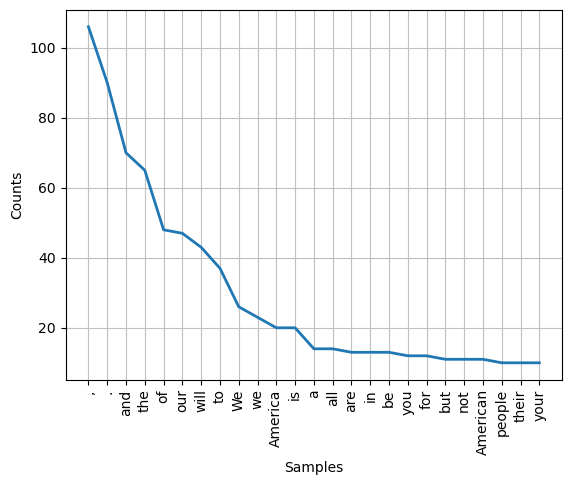

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
#%% Tokenizing Donald Trump's inaugural speech
from nltk.tokenize import sent_tokenize, word_tokenize

# Sentence tokenizing Trump's 2017 speech
trump2017sent = sent_tokenize(trump2017, language="english")
print(f"Object type of NLTK's sent_tokenize output is", type(trump2017sent))
print(trump2017sent[0:2])

# Word tokenizing Trum's 2017 speech
trump2017word = word_tokenize(trump2017, language="english")
print(f"Object type of NLTK's word_tokenize output is", type(trump2017word))
print(trump2017word[0:2])

# Frequency distribution of words
from nltk.probability import FreqDist
trump2017fdist = FreqDist(trump2017word)

# 25 most common words in Trump's 2017 speech
trump2017fdist.most_common(25)
trump2017fdist.plot(25)

### Text cleaning and normalisation

As shown in the chart in the previous example, we need to do some text cleaning and normalisation by removing punctuations and converting all to lower case characters. In essence, this crucial step in NLP aims to removing irrelevant characters and formatting. This is illustrated by the following lines of Python statements:
```python
# Begin with identifying non-textual elements
import retrump2017_alphanum = re.sub(r'[^a-zA-Z0-9\s]', '', trump2017)

# Remove irrelevant numerical characters
trump2017_nodigit = re.sub(r'\d+', ‘’, trump2017_alphanum)

# Strip extra spaces and tabs
Trump2017_cleaned = re.sub(r'\s+', ' ', trump2017_nodigit).strip()

```

In the next example, we implement this to clean the raw text of Trump's 2017 Inauguration speech and then redo the steps to tokenise the text by word and plot the frequency distribution. As shown in the resulting chart, we have removed the problems related to punctuations and text normalisation we identified previously. However, we can now see another problem that could hinder our ability in extracting meaning from the speech text. This problem relates to the presence of common English stop words.

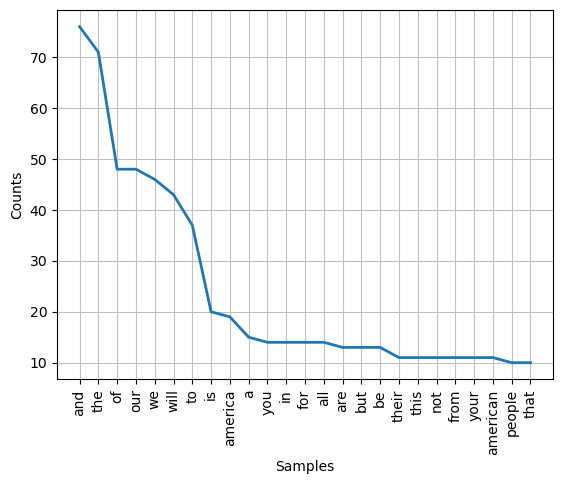

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
#%% Cleaning Trump's 2017 raw and redo the top 25 most frequent word analysis

# Removing non-textual (non-alphanumeric)
import re # using regex (see https://regexr.com/)

trump2017_alphanum = re.sub(r'[^a-zA-Z0-9\s]', '', trump2017)

# Remove irrelevant numerical chars (if necessary
trump2017_nodigit = re.sub(r'\d+', '', trump2017_alphanum)

# Strip extrac spaces and tabs
trump2017_cleaned = re.sub(r'\s+', ' ', trump2017_nodigit).strip()

# Normalising text to lower case
trump2017_lower = trump2017_cleaned.lower()

# Removing punctuations and other special chars
import string
translator = str.maketrans('', '', string.punctuation)
trump2017_normalised = trump2017_lower.translate(translator)

# Again if necessary remove digits
trump2017_normalised = ''.join([i for i in trump2017_normalised if not i.isdigit()])

# Now redo word tokenizing Trum's 2017 speech based on cleaned and normalised text
trump2017_norm_word = word_tokenize(trump2017_normalised, language="english")

# Frequency distribution of words in Trump normalised
trump2017normfdist = FreqDist(trump2017_norm_word)

# 25 most common words in Trump's 2017 speech
trump2017normfdist.most_common(25)
trump2017normfdist.plot(25)

### Filtering stop words

Common English stop words are common words such as “and”, “is”, and “the” that usually add insignificant meaning to the whole text to analyse. We can see from the preceding example that Trump's speech has its top 25 most frequent words dominated by such stop words. Because of this reason, often we want to have these stop words filtered out from the text analysis. To do this, we can define a list of stop words ourselves based on our text analysis objective. Alternatively, we can use a pre-compiled set of stop words such as the one which comes with the NLTK packages. The NLTK's stopwords set will need to be downloaded for its first use. The next example illustrate how to filter Trump's text, which we have cleaned and normalised in the preceding example, from English stop words using NLTK. After that, we redo the word-tokenising and plotting of token frequency distribution based on the filtered text.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apalangkaraya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


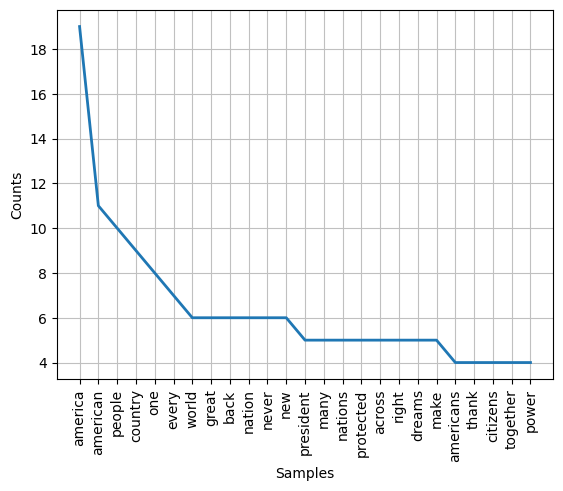

<Axes: xlabel='Samples', ylabel='Counts'>

In [12]:
#%% Filtering stop words in cleaned and normalised Trump's 2017 speech

#first, download the stopwords if necessary
download("stopwords")

from nltk.corpus import stopwords

#then import the stopwords
stop_words = set(stopwords.words("english"))

#an empty list to hold the words that make it past the filter:
f_trump2017w = []
#now filter the stopwords out from Trump’s 2017 inauguration speech
for word in trump2017_norm_word:
    if word.casefold() not in stop_words:
        f_trump2017w.append(word)

# 25 most common words in Trump's 2017 speech (stopwords removed)
f_trump2017fdist = FreqDist(f_trump2017w)
f_trump2017fdist.most_common(25)
f_trump2017fdist.plot(25)

### Stemming and Lemmatising

The result of the last example shows one further preprocessing step that we could do to improve our ability to extract the information we need from text data such as Trump's 2017 Inauguration speech. As shown in the frequency distribution plot of the last example, we have three distinct tokens for the words 'america', 'american', and 'americans'. In all likelihood, we would be able to extract the same information had these three tokens be reduced to one (say, 'america') or at least two (say, 'america' and 'americans' if we want to make the distinction between the two while ignoring the singular and plural distinction between 'american' and 'americans'). In other words, we could have implemented another pre-processing step which reduces all word tokens into the words' root forms. We can do that by implementing either stemming or lemmatising.

#### Stemming

Stemming is reducing words to their root (the core part of a word) to get their best guess of the root form. For example, the words “helping” and “helper” share the root “help”. Unlike lemmatising, which is discussed below, stemming does not really take into account the meaning or the part of speech role of the word to be stemmed. This is illustrated in the next simple example, in which which use one of NLTK's stemmers: the Porter stemmer. <br>

In the example below, which is adapted from ["Real Python"](https://realpython.com/nltk-nlp-python/), we have a simple text data containing two sentences: "USS Discovery crews have discovered many discoveries. Discovering is what explorers do." From the text we can see that the words "Discovery", "discovered", "discoveries", and "Discovering" could potentially have common root words. The output of NLTK's PorterStemmer() function suggests the following stemmed word:

|Original word| Stemmed word|
|-------------|-------------|
|'Discovery'  | 'discoveri' |
|'discovered' | 'discov'    |
|'discoveries'| 'discoveri' |
|'Discovering'| 'discov'    |

First, we can now understand when it is said earlier that "stemming does not really take into account the meaning or the part of speech role of the word to be stemmed". In fact, the stemmed words 'discoveri' and 'discov' are not even English words. However, the result of the stemming is useful in the sense that we now have two distinct tokens instead of four distinct tokens. While the stemmed words are not exactly English words to the letters, they still convey the meaning of the root word for 'discover' for example. 

_Overstemming and understemming_

One may now asks why should not all of original words listed in the above table have the same stemmed word instead of ‘discoveri’ and ‘discov’? The answer is maybe they should. However, we need to  remember that a stemmer aims to find variant forms of a word which are not necessarily complete words. As a result, we may end up understemming or overstemming and it will depend on our own judgement based on linguistic knowledge or other criteria.

```{note}
Understemming: when two related words should be reduced to the same stem but aren’t. This is a false negative. <br>
Overstemming: when two unrelated words are reduced to the same stem, when they shouldn’t be. This is a false positive.
```

In [13]:
#%% Stemming example using the Porter stemmer
from nltk.stem import PorterStemmer

#initialise the stemmer object
stemmer = PorterStemmer()

#example text to stem
mytext = """
    USS Discovery crews have discovered many discoveries. 
    Discovering is what explorers do.
    """

#first word-tokenize mytext
mywords = word_tokenize(mytext)

#now stemming using the Porter stemmer 
#(Note: instead of a normal loop, we use list comprehension)
mystems = [stemmer.stem(word) for word in mywords]

print("Original", mywords)
print("Stemmed", mystems)

Original ['USS', 'Discovery', 'crews', 'have', 'discovered', 'many', 'discoveries', '.', 'Discovering', 'is', 'what', 'explorers', 'do', '.']
Stemmed ['uss', 'discoveri', 'crew', 'have', 'discov', 'mani', 'discoveri', '.', 'discov', 'is', 'what', 'explor', 'do', '.']


#### Lemmatising

Lemmatizing is like stemming, but it only considers the lemma (i.e. full root word). So we won’t get non English words such as ‘discoveri’ or 'discov' shown in the previous example because these are not full root words or lemmas. Briefly, a lemma is a word that represents a whole group of words, and that group of words is called a lexeme. For example, each word entry listed in an English Dictionary is a lemma.

In the next example, we will compare the difference between stemming and lemmatising using a one word text example: "scarves". For the lemmatizer, in the example we use NLTK's `WordNetLemmatizer`. The result of stemming shows that the stemmed word for "scarves" is "scarv". In contrast, the lemma for "scarves" is "scarf", which is a proper singular root word for the original plural word "scarves".

In [14]:
#%% stemming vs. lemmatizing

print("Stemming 'scarves' result in:",stemmer.stem('scarves'))

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print("Lemmatizing 'scarves' result in:",lemmatizer.lemmatize('scarves'))

Stemming 'scarves' result in: scarv
Lemmatizing 'scarves' result in: scarf


_Lemmatising with specific parts-of-speech tagging_

In the second lemmatisation example with NLTK's `WordNetLemmatizer`, we show that the function takes a `pos = ` argument to tell the parts-of-speech role of the word to be lemmatised. In the example below, the first two statements ask `WordNetLemmatizer` to lemmatize the words 'loving' and 'love' without specifying parts-of-speech. The results are: `loving` has a lemma `loving` and `love` has a lemma `love`. However, on the third statement, we ask `WordNetLemmatizer` to lemmatize the words 'loving', but this time we indicate that this word is a verb. As a result, the lemma for `loving` as a verb is `love`. This is to be expected because the root word for the verb `loving` is the verb `love`. When we did not specify the parts-of-speech for `loving`, the word was treated as a noun. In this case the lemma for the noun word `loving` is `loving`.

```{note}
Specifying the parts-of-speech of the word to be lemmatised may be important.
```

In [15]:
#%% Lemmatizing 'loving' and 'love'      
      
print("Lemmatizing 'loving' result in:",lemmatizer.lemmatize('loving'))
print("Lemmatizing 'love' result in:",lemmatizer.lemmatize('love'))
print("Lemmatizing 'loving' as a verb result in:",
      lemmatizer.lemmatize('loving', pos='v'))

Lemmatizing 'loving' result in: loving
Lemmatizing 'love' result in: love
Lemmatizing 'loving' as a verb result in: love


### Parts-of-speech (POS) tagging

POS tagging is labelling the POS of each word in the text. In English, there are 8 parts of speech: noun, pronoun, adjective, verb, adverb, preposition, conjunction, and interjection. These different parts-of-speech can be illustrated with the following examples adapted from [Real Python](https://realpython.com/nltk-nlp-python/):

|Parts-of-speech | Role                                              | Examples                   |
|----------------|---------------------------------------------------|----------------------------|
|_Noun_          |A person, place, or thing                          | mountain, bagel, Poland    |
|_Pronoun_       |Replaces noun                                      | you, she, we               |
|_Adjective_     |Tells what a noun is like                          | efficient, windy, colourful|
|_Verb_          |An action or a state of being                      | learn, is, go              |
|_Adverb_        |Tells about a verb, adjective or adverb            | efficiently, always, very  |
|_Preposition_   |Tells how a noun or pronoun relates to other word  | from, about, at            |
|_Conjunction_   |Connects two words or phrases                      | so, because, and           |
|_Interjection_  |An exclamation                                     | yay, wow, ouch             | 

The previous example shows one reason why the ability to do automated POS tagging could be important. In the example we see that `loving` as a verb and `loving` as a noun have two different lemmas (`love` and `loving`, respectively). In the example, we only have one word to lemmatised, therefore it was not too hard for us to specify the `pos = 'v'` parameter in `WordNetLemmatizer` manually. However, in more realistic settings, we may have hundreds or thousands or more of words to lemmatise. In such cases, manually assigning value to the `pos = ` parameter in `WordNetLemmatizer` is no longer feasible. <br>

#### POS-tagging with NLTK

The example below shows how we can invoke NLTK's `post_tag` function to automatically POS tag the words in a given text data. For the first use, we need to download NLTK's tagger (in the example, we download "averaged_perceptron_tagger"). The results are as follows:

[('USS', 'NNP'), ('Discovery', 'NNP'), ('crews', 'NNS'), ('have', 'VBP'), ('discovered', 'VBN'), ('many', 'JJ'), ('discoveries', 'NNS'), ('.', '.'), ('Discovering', 'NNP'), ('is', 'VBZ'), ('what', 'WP'), ('explorers', 'NNS'), ('do', 'VBP'), ('.', '.')]

The three uppercase letters such as 'NNP' and 'VBP' are the POS tags. So, in the above results, we have for examples:

`"USS" as NNP (noun, proper, singular)`
`"Discovery" as NNP (noun, proper, singular)`
`"crews" as NNS (noun, common, plural)`

and so on. If you want to find out all possible POS tags in NLTK, the following Python codes will print the list:
```python
#%% To get the list of all POS tags and their descriptions
import nltk
download('tagsets')
nltk.help.upenn_tagset()
```

In [18]:
#%% POS tagging with nltk

#download the NLTK's tagger
download('averaged_perceptron_tagger')

#import the nltk’s pos_tag module
from nltk import pos_tag

#example text to stem
mytext = """
    USS Discovery crews have discovered many discoveries. 
    Discovering is what explorers do.
    """

#first word-tokenize mytext
mywords = word_tokenize(mytext)

#pos_tag expects the output of word_tokenize
mywords_pos = pos_tag(mywords)

print(mywords_pos)

[('USS', 'NNP'), ('Discovery', 'NNP'), ('crews', 'NNS'), ('have', 'VBP'), ('discovered', 'VBN'), ('many', 'JJ'), ('discoveries', 'NNS'), ('.', '.'), ('Discovering', 'NNP'), ('is', 'VBZ'), ('what', 'WP'), ('explorers', 'NNS'), ('do', 'VBP'), ('.', '.')]
$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these t

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\apalangkaraya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\apalangkaraya\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


#### Lemmatising with automated POS-tagging

In the example below, we show how to write a custom function (which we call `get_wordnet_pos`) which takes a word as its input and then uses NLTK's `pos_tag()` function to automatically identify the parts-of-speech of the word and pick the first character of the POS tags and translate it to a POS tag codes that is understood by the `WordNetLemmatizer` to be used as the value for the `pos = ` parameter when we call the `lemmatize()` method of the lemmatizer. There are four values we can set the `pos = ` parameter with, and each of these is associated with the first character of the POS tags returned by NLTK's `pos_tag()` function as follows:
- 'J' is equal to `wordnet.ADJ` which stands for an adjective.
- 'N' is equal to `wordnet.NOUN` which stands for a noun.
- 'V' is equal to `wordnet.VERB` which stands for a verb.
- 'R' is equal to `wordnet.VERB` which stands for an adverb.

We then use a call to our custom function to set the POS parameter in `.lemmatize()` call: `pos = get_wordnet_pos(word)`. In the example, we lemmatize each word in the word list `['lovely', 'loving', 'loved', 'love', 'lovingly']` and obtain the following associated lemmas: 


|Word     |POS        | Lemmatized|
|---------|-----------|-----------|
|lovely   |r (adverb) | lovely    |
|loving   |v (verb)   | love      |
|loved    |v (verb)   | love      |
|love     |n (noun)   | love      |
|lovingly |r (adverb) | lovingly  |

In [20]:
#%% Lemmatizing with correct POS tag

# First we define a function that will identify the POS tag for a given word
# and then classify this POS tag into four categories: J, N, V, R
# (These are the single character accepted by the pos= option for the 
# WordNet lemmatizer)
def get_wordnet_pos(word):
    """ Get Part-of-speech (POS) tag of input word, and return the first POS 
    tag character (which is the character that lemmatize() accepts as input)
    """
    
    from nltk import pos_tag
    from nltk.corpus import wordnet
    
    tag_firstchar = pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ,
                'N': wordnet.NOUN,
                'V': wordnet.VERB,
                'R': wordnet.ADV}

    return tag_dict.get(tag_firstchar, wordnet.NOUN)  # Note that the default value to return is "N" (NOUN)

# Now test the lemmatizer with POS tag for a number of words
for word in ['lovely', 'loving', 'loved', 'love', 'lovingly']:
    print('Word:', word)
    print('POS: ', get_wordnet_pos(word))
    print('Lemmatized:', lemmatizer.lemmatize(word, pos=get_wordnet_pos(word)))
    print()

Word: lovely
POS:  r
Lemmatized: lovely

Word: loving
POS:  v
Lemmatized: love

Word: loved
POS:  v
Lemmatized: love

Word: love
POS:  n
Lemmatized: love

Word: lovingly
POS:  r
Lemmatized: lovingly



Now we are ready to lemmatise the text of Trump's 2017 Inauguration speech. We will used the text data which have been cleaned, normalised, and filtered. The resulting plot of top 25 most frequent words and their frequency counts can be compared with the plots from previous runs as shown in the image below:

![Trump Speech](trumpspeech.png)

For example, the word 'nation' is now the fourth most frequent word, raising from the 10th position before lemmatisation. Similarly for the word 'make'. This is consistent with Trump's theme of appeal which is to make America as a nation great again. 

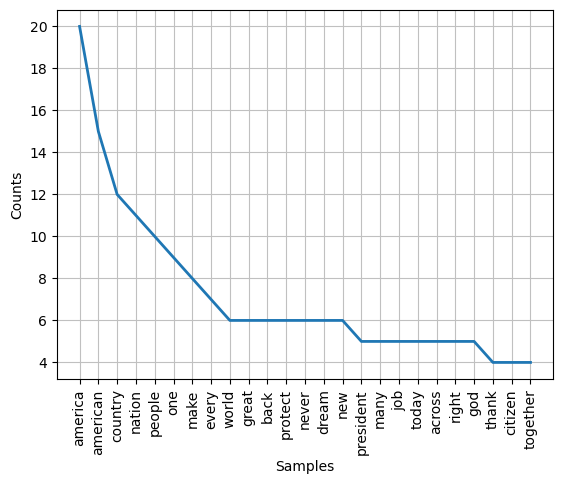

<Axes: xlabel='Samples', ylabel='Counts'>

In [21]:
#%% Lemmatizing filtered Trump's 2017 innauguration speech

# stored the lemmatized list of words in Trump's speec here
lf_trump2017w = []

# lemmatize each word in Trump's speech (where stop words already removed)
for word in f_trump2017w:
    lf_trump2017w.append(
        lemmatizer.lemmatize(word, pos=get_wordnet_pos(word)))
    
# 25 most common words in lemmatized Trump's 2017 speech (stopwords removed)
lf_trump2017fdist = FreqDist(lf_trump2017w)
lf_trump2017fdist.most_common(25)
lf_trump2017fdist.plot(25)

## Text Similarity

### Text similarity measures

Let's considere the following frequently asked question: Given Text A and Text B, how can measure their similarity level?

In NLP, there are a number of alternative measures that have been developed:

- Jaccard similarity: The similarity score is calculated based on Jaccard Distance index using the intersection or union of the two sets representing the two texts (Text A and Text B). More specifically, _Jaccard Distance Index_ is defined as the ratio between the number words or characters in both sets (that is, the number of elements in the intersection of the two sets) to the number of elements in either set (that is, the number of elements in the union of the two sets). Jaccard Similarity is equal to 1 - Jaccard Distance.

- Levenshtein distance: The minimum number of insertions, deletions, and replacements required for transforming Text A into Text B. For example, transforming the word “rain” to the word “shine” requires three steps: 
    - (i) “rain” -> “sain”, 
    - (ii) “sain -> “shin”, and 
    - (iii) “shin” -> “shine”.

- Hamming distance: The number of positions with the same symbol/character in both texts. (Note: This measure is only valid if Text A and Text B are of equal length.
- Cosine similarity: First, project Text A and Text B into two separate vectors in some predefined space. Then, the cosine distance between Text A and Text B is calculated as the cosine of the angle between the two vectors. Finally, cosine similarity is equal to 1 - Cosine Distance.

#### Jaccard similarity example

In the example below we use NLTK's `jaccard_distance` function to compute Jaccard Similarity = 1 - jaccard_distance(set1, set2). In this case, we need to construct set1 and set2 as the set object that represent two texts which we want to compare the similarity.

In the example, five different simple texts are considered:
- text1 = "I like NLP"
- text2 = "I am exploring NLP"
- text3 = "I am a beginner in NLP"
- text4 = "I want to learn NLP"
- text5 = "I like advanced NLP"

Since each text consists of several words, we have two options to construct the comparison sets:
- We can create set based on characters as the elements of the set.
- We can create set based on words as the elements of the set.

The example compare the differences from using character and word as set elements when we compute Jaccard Similarity betwen text1 and text2 and between text1 and text5.

In [22]:
#%% Jaccard text similarity 

text1 = "I like NLP"
text2 = "I am exploring NLP"
text3 = "I am a beginner in NLP"
text4 = "I want to learn NLP"
text5 = "I like advanced NLP"

#Jaccard similarity in terms of character sets
set1 = set(text1)
print(set1)
set2 = set(text2)
print(set2)
set5 = set(text5)
print(set5)

jaccsim = 1 - nltk.jaccard_distance(set1, set2)
print(f"Jaccard Similarity of text1 and text2 {jaccsim:.2f}") 

jaccsim = 1 - nltk.jaccard_distance(set1, set5)
print(f"Jaccard Similarity of text1 and text5 {jaccsim:.2f}") 

#Jaccard similarity in terms of word sets
set1 = set(text1.split())
print(set1)
set2 = set(text2.split())
print(set2)
set5 = set(text5.split())
print(set5)

jaccsim = 1 - nltk.jaccard_distance(set1, set2)
print(f"Jaccard Similarity of text1 and text2 {jaccsim:.2f}") 

jaccsim = 1 - nltk.jaccard_distance(set1, set5)
print(f"Jaccard Similarity of text1 and text5 {jaccsim:.2f}") 

{' ', 'P', 'l', 'I', 'N', 'k', 'i', 'e', 'L'}
{'g', ' ', 'P', 'x', 'l', 'I', 'o', 'N', 'r', 'i', 'm', 'e', 'p', 'n', 'a', 'L'}
{' ', 'P', 'l', 'I', 'N', 'k', 'd', 'i', 'e', 'v', 'c', 'n', 'a', 'L'}
Jaccard Similarity of text1 and text2 0.47
Jaccard Similarity of text1 and text5 0.64
{'like', 'NLP', 'I'}
{'am', 'exploring', 'NLP', 'I'}
{'advanced', 'like', 'NLP', 'I'}
Jaccard Similarity of text1 and text2 0.40
Jaccard Similarity of text1 and text5 0.75


#### Levenshtein edit distance

In NLTK, the Levenshtein edit distance can be computed using the edit_distance() function. The function takes as input two string objects to be compared. It also takes boolean value parameter `transpositions(bool)` which is set to False as default. If it is set to True, thenthe transposition edits such as from "ab" to "ba" is enabled. In the example below, we consider again the comparisons of (text1, text2) and (text1, text5). First note that edit distance's value range is 0 to any positive number. In other words, there is no maximum value and therefore there is no natural Levenshtein similarity. Secondly, if we compare Levenshtein edit distance to Jaccard distance, it appears that the former can provide a less sensitive measurement of the distance between the two text. For example, the distance between text1 and text2 is 9 and the distance between text1 and text5 is 10. Hence, the difference between the two distances is only 1. This is less sensitive than the comparison of the two Jaccard distances in the previous example.

In [24]:
#%% Levenshtein edit distance

print("text1", text1)
print("text2", text2)
print("text3", text5)

lev = nltk.edit_distance(text1, text2, transpositions=False)
print(f"Levenshtein Distance of text1 and text2 {lev}")

lev = nltk.edit_distance(text1, text5, transpositions=False)
print(f"Levenshtein Distance of text1 and text5 {lev}")

text1 I like NLP
text2 I am exploring NLP
text3 I like advanced NLP
Levenshtein Distance of text1 and text2 10
Levenshtein Distance of text1 and text5 9


#### Cosine similarity

A more interesting and often used text similarity measure is the cosine similarity. First of all, unlike the previously discussed similarity measures, cosine similarity can be constructed as both syntatic and semantic similarity measures. The Jaccard similarity and Levenshtein similarity are syntatic measures of similarity because they are purely based on textual differences as oppposed to differences in terms of the meanings of the text. For example, the word "wonderful" and "great" are quite dissimilar if we focus only on the texttual representation. However, they are quite similar in terms of meanings. <br>

In essence, cosine similarity is constructed by comparing the corresponding word embedding vectors (i.e., vector projection) of the texts to be compared. For example, the diagram [below](https://www.cs.cmu.edu/~dst/WordEmbeddingDemo/tutorial.html) illustrates how each element of the words set which includes "grandfather", "man", "boy" "adult", "woman", "child", "infant", and "girl" can be projected into a vector on, in this example, a two-dimensional space defined by "age" and "gender". That is, we imagine the relative position of these words if measured in terms of age and gender. For example, "grandfather" and "man" are quite similar in terms of gender (they both are male gender), however they are a bit different in terms of age (with grandfather > man, in general, in terms of age).

![Word Vector](wordvector.png)

Given the word vectors, then cosine Similarity = the cosine of the angle between two word vectors. More formally, the cosine similarity of Doc1 and Doc2 is defined as the angle between $\vec{a}$ = "vector(Doc1)" and $\vec{b}$ ="vector(Doc2)" where a "vector(doc)" is the vector projection created by  word embedding (i.e. the vector in Document Term Matrix, which we will discuss in more details later). Given document vectors $\vec{a}$ and $\vec{b}$ , then $cos⁡(\vec{a},\vec{b}) =\frac{(\vec{a} ∙ \vec{b})}{(‖\vec{a}‖∙‖\vec{b}‖)}=\frac{\sum_{i} a_i b_i}{\sum_{i} a_i a_i \sum_{i} b_i b_i}$ 

The following [diagram](http://www.learndatasci.com/glossary/cosine-similarity/) illustrates some possible angles between two word vectors:

![Angle](angle.png)

#### Word vectorizing using CountVectorizer

As mentioned earlier, we construct the word vectors without paying attention to word meaning and by focusing only on textual appearance. If we do this, then the cosine similarity measure reflects the syntatic similarity of the texts being compared. In the example below, we see how we can use the `CountVectorizer` from the Sci-Kit Learn package (`sklearn`)'s collection of feature_extraction modules. The basic idea of the CountVectorizer is to create a Document-Term matrix in which each column in the matrix represent a vector of frequency count of how many times each specific term appears in each doument. The example below illustrates what is meant by this. <br>

Let's consider the following three very simple documents:
- doc1 = "This document is about trees only and not about cars."
- doc2 = "This document is about cars and buses.“
- doc3 = "This is about a bus and a car."

Assumming we have pre-processed these text data, we can manually create a vector representation of each document using count vectors to create the following Document-Term matrix (DTM):

|      |a     |about|and   |be    |bus   |car    |document|not    |only    |this   |tree   | 
|------|------|-----|------|------|------|-------|--------|-------|--------|-------|-------|
|index |0     |1    |2     |3     |4     |5      |6       |7      |8       |9      |10     |
|doc1  |0     |2    |1     |1     |0     |1      |1       |1      |1       |1      |1      | 
|doc2  |0     |1    |1     |1     |1     |1      |1       |0      |0       |1      |0      | 
|doc3  |2     |2    |1     |1     |1     |1      |0       |0      |0       |1      |0      | 

Thus, for example, in doc3 the term "a" appears twice. Hence in column "a" and row "doc3" the value is 2 (which is the frequency count of the term "a" in document "doc3"). In other words, the above DTM summarises doc1, doc2, and doc3 completely. This is what we mean by projecting a document to a vector space. In this case, the vector space is defined by a simple frequency count of how many times each term appears in each document. 

Obviously, if we have a more complext text data with many rows of documents and each document is much longer, creating the count vector DTM manually will become infeasible very quickly. Luckily, we can automate the process by utilising the `CountVectorizer()` function in the sklearn package as illustrated in the example below. In the example, we first pre-process the documents (in the example, this is the list object named `docs`). The pre-processed text is saved in a separate list object named `docs_p`. Then, we construct a `CountVectorizer` object which we named as countvectorizer and `.fit` and `.transform` the vectorizer onto our text data (`docs_p`) and save the resulting DTM as `countvector` as follows:

```python
countvectorizer = count_vectorizer.fit(docs_p)
countvector = count_vectorizer.transform(docs_p)
```

Since `countvector` object is of type sparse matrix and sklearn's `cosine_similarity` requires DataFrame as input, we first create `countvectordf` object as a DataFrame which contains our DTM as shown below. Then, we compute cosine_similarity by passing `countvectordf` to sklearn's `cosine_similarity`.

```python
# Now compute cosine similarity based on the countvector
from sklearn.metrics.pairwise import cosine_similarity
countvectordf = pd.DataFrame(data=countvector.todense(),
                     columns=countvectorizer.get_feature_names_out())
print(countvectordf)
cosine_sim = cosine_similarity(countvectordf)
```
Lastly, we creat a heatmat plot to provide a quick visualisation of the consine similarity scores between the pairs: (doc1, doc2) = 0.76, (doc1, doc3) = 0.55, and (doc2, doc3) = 0.72.

{'this': 9, 'document': 6, 'be': 3, 'about': 1, 'tree': 10, 'only': 8, 'and': 2, 'not': 7, 'car': 5, 'bus': 4, 'a': 0}
Encoded Document is:
[[0 2 1 1 0 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 0 0 1 0]
 [2 1 1 1 1 1 0 0 0 1 0]]
   a  about  and  be  bus  car  document  not  only  this  tree
0  0      2    1   1    0    1         1    1     1     1     1
1  0      1    1   1    1    1         1    0     0     1     0
2  2      1    1   1    1    1         0    0     0     1     0
Cosine similarity
 [[1.         0.76376262 0.54772256]
 [0.76376262 1.         0.71713717]
 [0.54772256 0.71713717 1.        ]]


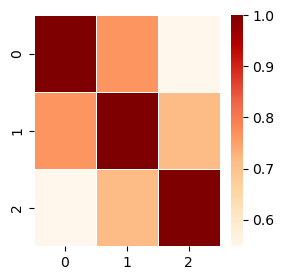

In [26]:
#%% Count vectorizer
import pandas as pd

def get_wordnet_pos(word):
    """ Get Part-of-speech (POS) tag of input word, and return the first POS 
    tag character (which is the character that lemmatize() accepts as input)
    """
    
    from nltk import pos_tag
    from nltk.corpus import wordnet
    
    tag_firstchar = pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ,
                'N': wordnet.NOUN,
                'V': wordnet.VERB,
                'R': wordnet.ADV}

    return tag_dict.get(tag_firstchar, wordnet.NOUN)  # Note that the default value to return is "N" (NOUN)

docs = ["This document is about trees only and not about cars.", 
        "This document is about cars and buses.", 
        "This is about a bus and a car."]

#importing the function
from sklearn.feature_extraction.text import CountVectorizer

#token_pattern = r"(?u)\b\w+\b" means dont ignore single letter words
#(The default pattern only considers words with 2 or more letters)
count_vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b")

# pre-process docs: word tokenize, remove punctuations, and lemmatize
docs_p = []
for doc in docs:
    #word tokenize
    doc = word_tokenize(doc, language="english")
    #convert lowercase then remove punctuations
    doc =[word.lower() for word in doc  if word.isalpha()]
    #lemmatize
    doc = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(word)) for word in doc]
    #join the words into the original doc format
    docs_p.append(' '.join(doc))
    
countvectorizer = count_vectorizer.fit(docs_p)
countvector = count_vectorizer.transform(docs_p)

# Summarizing the Encoded Texts
print(countvectorizer.vocabulary_)
print("Encoded Document is:")
print(countvector.toarray())

# Now compute cosine similarity based on the countvector
from sklearn.metrics.pairwise import cosine_similarity
countvectordf = pd.DataFrame(data=countvector.todense(),
                     columns=countvectorizer.get_feature_names_out())
print(countvectordf)
cosine_sim = cosine_similarity(countvectordf)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(len(docs_p),len(docs_p)))
sns.heatmap(cosine_sim, cmap='OrRd', linewidth=0.5)

print("Cosine similarity\n", cosine_sim)

#### TF-IDF Vectorizer

_The problems with count vector_

In the example above, we can see that some terms such as “this” appear in all documents. In other words, these terms are not distinctive. That is, if all documents contain "this", then we cannot use this term to differentiate between the documents. However, it is quite possible that other terms are more distinctive to each document. For example, the term “tree” is distinct (unique) to doc1 and the terms “a” is distinct (unique) to doc2. The presence and absence of distinctive words could have implication on the similarity scores between two documents. For example, can we use the different distinctiveness of different terms to say that doc2 and doc3 are less similar compared to doc1 and doc2? <br>

We will try to find the answer by looking at the TF-IDF Vectorizer which considers both the frequency count and distinctiveness of the terms when constructing the Document-Term Matrix (DTM). 

_Term Frequency (TF)_

$TF$ is a measure of frequency of the appearance of a given term $t$ in any given document $d$. More formally, it is defined as: <br>

$TF(t,d) = \textrm{Number of times term } t \textrm{ appears in document } d$ <br>

Let's consider again our previous three simple documents:
- doc1 = "This document is about trees only and not about cars."
- doc2 = "This document is about cars and buses.“
- doc3 = "This is about a bus and a car."

In this example, using the definition of $TF$ given above, we can compute the following values:
- $TF(\textrm{"this", doc1}) = 1$; $TF(\textrm{"this", doc2}) = 1; $TF(\textrm{"this", doc3}) = 1$;
- $TF(\textrm{"about", doc1}) = 2$; $TF(\textrm{"about", doc2}) = 1$; $TF(\textrm{"about", doc3}) = 1$;
- $TF(\textrm{"car", doc1}) = 1$; $TF(\textrm{"tree", doc1}) = 1$; $TF(\textrm{"bus", doc2}) = 1$;

_Inverse Document Frequence (IDF)_

$IDF$ is a measure of the distinctiveness of any given term $t$ in the corpus (i.e. the whole set of documents). Formally, it is defined as: <br>

$IDF(t) = ln(\frac{1 + N}{1 + DF}) + 1$ <br>

where $N$ = Number of documents in the corpus and $DF(t)$ = Number of documents in the corpus which contain the term $t$

In the abover formula, we add 1 to the fraction to ensure that we do not divide with 0.

Again, for examples, if our corpus contains the three documents specified in the preceding example above, then we can use the $IDF$ formula to make the following computation:

- $IDF(\textrm{"this"}) = ln(\frac{1+3}{1+3})+1 = ln(1) + 1 = 1$
- $IDF(\textrm{"about"}) = ln(\frac{1+3}{1+3})+1 = ln(1) + 1 = 1$
- $IDF(\textrm{"tree"}) = ln(\frac{1+3}{1+1})+1 = log(2) + 1 = 1.693$
- $IDF(\textrm{"bus"}) = ln(\frac{1+3}{1+1})+1 = log(2) + 1 = 1.693$

_TFIDF_

Now, we can define $TFIDF(t, d) = TF x IDF$ as a measure of both term's importance and distinctiveness. The main idea of using TF-IDF Vectorizer instead of the raw Count Vectorizer is to scale down the impact of terms that occur very frequently in a given corpus (because this term is less informative) than terms that occur in a small fraction of the corpus. <br>

So, to continue our example above, we have the following TFIDF weights for a specific term in any specific document:
- $TFIDF(\textrm{"this", doc1}) = 1 x 1 = 1$
- $TFIDF(\textrm{"about", doc1}) = 2 x 1 = 2$
- $TFIDF(\textrm{"tree", doc1}) = 1 x 1.693 = 1.693$
- $TFIDF(\textrm{"bus", doc2}) = 1 x 1.693 = 1.693$

_TFIDF Vectorizer_

As is the case with CountVectorizer, the `sklearn` package provides a `TfidfVectorizer` which allows for an automated computation of the TFIDF weights. The example codes below show how we can construct a tfidfvectorizer object as follows:

```python
#%% TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#initialising the TFIDF vectorizer
tfidfvectorizer = TfidfVectorizer(norm=None)

#Generating the TFIDF vectors based on the corpus
tfidfvector = tfidfvectorizer.fit_transform(docs_p)
```

Notice that in this example, we set the normalisation parameter of TfidfVectorizer to None (i.e., `norm = None`). This is just to demonstrate that our manual calculation above yields identical weights to the ones computed by TfidfVectorizer. In practice, it is highly recommended to leave the `norm` parameter to its default values (`norm = 'l2') (see [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#)). The normalisation parameter makes sure that our TFIDF weight vectors has values between 0 and 1.

      about       and        be       bus       car  document       not  \
0  0.468057  0.234029  0.234029  0.000000  0.234029  0.301354  0.396245   
1  0.346766  0.346766  0.346766  0.446524  0.346766  0.446524  0.000000   
2  0.387547  0.387547  0.387547  0.499037  0.387547  0.000000  0.000000   

       only      this      tree  
0  0.396245  0.234029  0.396245  
1  0.000000  0.346766  0.000000  
2  0.000000  0.387547  0.000000  
[[1.         0.6214808  0.54418217]
 [0.6214808  1.         0.89477162]
 [0.54418217 0.89477162 1.        ]]


<Axes: >

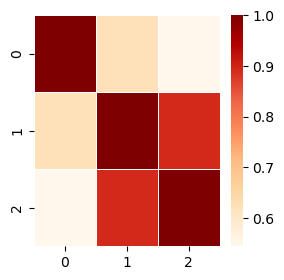

In [27]:
#%% TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#initialising the TFIDF vectorizer
tfidfvectorizer = TfidfVectorizer()

#Generating the TFIDF vectors based on the corpus
tfidfvector = tfidfvectorizer.fit_transform(docs_p)
#print(tfidfvector)

#Storing the TFIDF vectors as DataFrame to be used as input for cosine_similarity
tfidf_df = pd.DataFrame(data=tfidfvector.todense(),
                     columns=tfidfvectorizer.get_feature_names_out())
print(tfidf_df)

#compute cosine similarity based on TFIDF
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_df)
print(cosine_sim)

plt.figure(figsize=(len(docs_p),len(docs_p)))
sns.heatmap(cosine_sim, cmap='OrRd', linewidth=0.5)


_One more TFIDF vectorizer example_

In the following example codes, we work with another example adapted from the "Blueprints for Text Analytics" book with a simple corpus which contains the following documents:

```python
# Example taken from "Blueprints for text analytics"
docs = ["It was the best of times", 
        "it was the worst of times", 
        "it was the age of wisdom", 
        "it was the age of foolishness", 
        "John likes to watch movies and Mary likes movies too.", 
        "Mary also likes to watch football games."]
```

The objective of the example is to demonstrate how the corpus can be converted into document-term matrix using CountVectorizer and TfidfVectorizer and how the difference in the vector values lead to the difference in the resulting cosine similarity scores.

Note: The example also demonstrates how to write a custom pre-processing function that can be reused for other NLP analysis.

In [29]:
#%% user written functions to simplify codes

#preprocess function
def preprocess(docs, filtpunc=True):
    """
        Input: List of English sentences
        Output: preprocessed list of sentences
        Preprocessing: 
            1. filtered punctuations (if punct==True)
            2. lemmatized (with POS tag) and converted to lowercase.
    """
    def get_wordnet_pos(word):
        """ Get Part-of-speech (POS) tag of input word, and return the first POS 
        tag character (which is the character that lemmatize() accepts as input)
        """
    
        from nltk import pos_tag
        from nltk.corpus import wordnet
    
        tag_firstchar = pos_tag([word])[0][1][0].upper()
        tag_dict = {'J': wordnet.ADJ,
                    'N': wordnet.NOUN,
                    'V': wordnet.VERB,
                    'R': wordnet.ADV}

        return tag_dict.get(tag_firstchar, wordnet.NOUN)  # Note that the default value to return is "N" (NOUN)

    from nltk import word_tokenize
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    docs_p = []
    
    if docs == None:
        return docs_p
    else:
        for doc in docs:

            #word tokenize
            doc = word_tokenize(doc, language="english")

            #convert lowercase then remove punctuations
            if filtpunc:
                doc =[word.lower() for word in doc  if word.isalpha()]
            else:
                doc =[word.lower() for word in doc]
                    
            #lemmatize
            doc = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(word)) for word in doc]
            
            #join the words into the original doc format
            docs_p.append(' '.join(doc))
    
    return docs_p

#%% Another example of mesuring syntatic similarity using CountVectorizer
# and TfidfVectorizer
# Example taken from "Blueprints for text analytics"
docs = ["It was the best of times", 
        "it was the worst of times", 
        "it was the age of wisdom", 
        "it was the age of foolishness", 
        "John likes to watch movies and Mary likes movies too.", 
        "Mary also likes to watch football games."]

#import the CountVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords

#first step: preprocess the text data “docs”
pdocs = preprocess(docs) #preprocess() is our own function to do the tokenizing, filtering, and lemmatizing

#second step: build the vocabulary (the terms in the documents)

#initialise the CountVectorizer object (excluding stopwords from vocabulary)
cv = CountVectorizer(stop_words=stopwords.words('english'))
#cv = CountVectorizer()
#build vocabulary
cv.fit(pdocs)
print(cv.get_feature_names_out()) #printing the vocabulary

#third step: transform the document into vector (i.e., build the Document Term Matrix)
dt = cv.transform(pdocs)
print(type(dt)) #dt is a sparse matrix to conserve memory
#to make it easier to read, we create a DataFrame object for dt. For this we need to transform dt to a dense array first.
dt_df = pd.DataFrame(dt.toarray(), columns=cv.get_feature_names_out())

#fourth step: computing cosine similarity between each pair of the sentences
from sklearn.metrics.pairwise import cosine_similarity
cosinesim_df = pd.DataFrame(cosine_similarity(dt,dt))
print("Count vectorizer cosine similarity")
print(cosinesim_df)

#TF-IDF model to optimise the document vectors
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf_dt = tfidf.fit_transform(dt)
tfidf_dt_df = pd.DataFrame(tfidf_dt.toarray(), columns=cv.get_feature_names_out())
tfidfcosinesim_df = pd.DataFrame(cosine_similarity(tfidf_dt_df,tfidf_dt_df))
print("TFIDF vectorizer cosine similarity")
print(tfidfcosinesim_df)

#note: above we use TfidfTransformet to create tfidf and tfidf_df based on
#the countvectorizer (output we obtained earlier. Alternatively, we can get the
#same result by directly using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer(stop_words=stopwords.words('english'))
tfidf2_dt = tfidf2.fit_transform(pdocs)
tfidf2_dt_df = pd.DataFrame(tfidf2_dt.toarray(), 
                            columns=tfidf2.get_feature_names_out())


['age' 'also' 'bad' 'best' 'foolishness' 'football' 'game' 'john' 'like'
 'mary' 'movie' 'time' 'watch' 'wisdom']
<class 'scipy.sparse._csr.csr_matrix'>
Count vectorizer cosine similarity
     0    1    2    3         4         5
0  1.0  0.5  0.0  0.0  0.000000  0.000000
1  0.5  1.0  0.0  0.0  0.000000  0.000000
2  0.0  0.0  1.0  0.5  0.000000  0.000000
3  0.0  0.0  0.5  1.0  0.000000  0.000000
4  0.0  0.0  0.0  0.0  1.000000  0.492366
5  0.0  0.0  0.0  0.0  0.492366  1.000000
TFIDF vectorizer cosine similarity
          0         1         2         3         4         5
0  1.000000  0.402065  0.000000  0.000000  0.000000  0.000000
1  0.402065  1.000000  0.000000  0.000000  0.000000  0.000000
2  0.000000  0.000000  1.000000  0.402065  0.000000  0.000000
3  0.000000  0.000000  0.402065  1.000000  0.000000  0.000000
4  0.000000  0.000000  0.000000  0.000000  1.000000  0.399499
5  0.000000  0.000000  0.000000  0.000000  0.399499  1.000000


### Semantic similarity

So far, even when we use cosine similarity measures, our examples are still focused on producing syntatic similarity measures by ignoring the meanings of the words. There are several reasons why such a "bag of words" similarity measures may not be desirable. More specifically, the bag of words similarity measures are based only on common tokens (words) in the documents. They measure syntactic similarity and basically depend on the presence of shared tokens. If there are no shared tokens, then by definition the cosine similarity will be zero. For example, consider these two short sentences: 
- “What a wonderful movie.”, and 
- “The film is great.”
These two sentences have no common word (i.e. there is no shared token). As a result, the syntactic similarity measure of the two sentences is zero. However, we know that the meanings of the sentences are quite similar. In other words, the semantic similarity measure of the two sentences is obviously not zero. Therefore, we need a different approach to Word Embedding that can go beyond the CountVectorizer and TfidfVectorizer discussed above so that the resulting document-term matrix can be used for measuring semantic similarity.

#### Word embedding

Consider the following diagram taken from the book *Blueprints for Text Analytics Using Python*. The main objective of `word embedding` is to find a vector representation of a word such that words with similar meaning will have similar vectors. The basic underlying idea is that words occurring in similar contexts, and thus close in terms of their vector representation, have similar meanings. So, in the diagram, the difference between "queen" and "king" is approximately the same as the difference between "woman" and "man" and that "man" and "king" are more similar with each other than "man" and "queen". Furthermore, as can be seen from the document-term matrix values, the vector representation of Queen is dominated by high values in terms of "Royalty", "Femininity" and "Livelines". Hence, the similar terms to "Queen", such as "Women" and "King" would have high values in some of Queen's dominant terms.

![word embedding](wordembedding.png)

In short, with word embedding, words with similar meaning (eventhough textually they may appear quite different) will be found in similar locations in the vector space as illustrated in the [diagram](https://www.shanelynn.ie/get-busy-with-word-embeddings-introduction/) below.

![word embedding2](wordembedding2.png)

_Word embedding in Python_

Fortunately for us, there are Python packages which provide pre-trained sets of word embeddings developed based on large corpus such as the entire Wikipedia and Google News articles. These packages include:
- Spacy, a high-performance natural language processing library
- Gensim, a library focussed on topic-modelling applications.
Alternatively, if we have the required data, it is also possible to train our own word embedding models. This is especially useful if our text data have little commonality with the text data used to develop the word embeddings provided by the above packages.

In the example below, we demonstrate how to use Spacy's medium size word embeddings (Spacy's medium English model has 20,000 unique vectors of 300 dimensions.) to produce cosine similarity measures based on semantic similarity (which we will compare to the results based on syntatic similarity). 

```{note}
If this is the first time you use Spacy and/or Spacy's word embeddings, then you may need to install Spacy and/or download its word embeddings first. This can be done from your Anaconda Terminal or Command Prompt window and then executing the following commands in sequence: 

>>> pip install spacy

When spacy installation is completed, execute:

>>> python -m spacy download en_core_web_md
```
In the first part of the example, we just want to see what the 300-dimensional word vector of Spacy looks like. <br>

Then in the second part of the example we look at how syntatic cosine similarity based on Tfidf vectors and semantic cosine similarity based on Spacy word embedding vector may differ and see whether the difference is intuitive. In  the example, we consider docs2 which contains the following three sentences:

- sentence1: "Hello they are document similarity calculations" 
- sentence2: "Hey these are text similarity computations"
- sentence3: "Hi those are manuscript likeness computations"

From a quick read of the sentences we can tell that they all are rather similar in termsof meaning. In fact, our Spacy cosine similarity measures indicate that their pairwise semantic cosine similarity scores to be all around 0.9. In contrast,  the syntatic cosine similarity scores based on Tfidf vectors are much lower at 0.20 or less. In conclusion, if word meaning matters, then we must use word embeddings to construct semantic similarity measures.

In [ ]:
# import the Spacy module (which comes preinstalled with Anaconda)
import spacy

# Load the spacy model that you have installed
nlp = spacy.load('en_core_web_md')

# Now process a sentence using the model. The nlp() function assign 
# a pretrained word embedding vector of dimension 300 for each word in the
# input text.

inputtext = "This is some text that I am processing with Spacy" 
doc = nlp(inputtext)

# Get the vector for the word 'text' (position index 3 in inputtext)
doc[3].vector

# Get the average vector for the entire sentence (useful for sentence 
# classification etc.)
doc.vector

#%%syntatic vs semantic similarity
 
docs2 = ["Hello they are document similarity calculations", 
        'Hey these are text similarity computations',
        'Hi those are manuscript likeness computations']

print(f"Sentence 1: {docs2[0]}")
print(f"Sentence 2: {docs2[1]}")
print(f"Sentence 3: {docs2[0]}")
print()

#syntatic similarity

pdocs2 = preprocess(docs2)

tfidf3 = TfidfVectorizer()
tfidf3_dt = tfidf3.fit_transform(pdocs2)
tfidf3_dt_df = pd.DataFrame(tfidf3_dt.toarray(), 
                            columns=tfidf3.get_feature_names_out())
tfidf3sim_df = pd.DataFrame(cosine_similarity(tfidf3_dt_df,tfidf3_dt_df))

print(f"TFIDF: sentence1 & sentence2 similarity: {tfidf3sim_df.iloc[1,0]:.2f}") 
print(f"TFIDF: sentence2 & sentence3 similarity: {tfidf3sim_df.iloc[1,2]:.2f}") 
print(f"TFIDF: sentence1 & sentence3 similarity: {tfidf3sim_df.iloc[0,2]:.2f}") 
print()

#semantic similarity
doc1 = nlp(docs2[0])
doc2 = nlp(docs2[1])
doc3 = nlp(docs2[2])
 
print(f"Spacy: sentence1 & sentence2 similarity: {doc1.similarity(doc2):.2f}") 
print(f"Spacy: sentence2 & sentence3 similarity: {doc2.similarity(doc3):.2f}") 
print(f"Spacy: sentence1 & sentence3 similarity: {doc1.similarity(doc3):.2f}")  
print()




TFIDF: sentence1 & sentence2 similarity: 0.20
TFIDF: sentence2 & sentence3 similarity: 0.20
TFIDF: sentence1 & sentence3 similarity: 0.07
Spacy: sentence1 & sentence2 similarity: 0.90
Spacy: sentence2 & sentence3 similarity: 0.90
Spacy: sentence1 & sentence3 similarity: 0.89
